In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs 
%matplotlib inline
plt.style.use('ggplot')

/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from numpy import unique
from numpy import hstack
from numpy import vstack
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs, make_classification

In [4]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

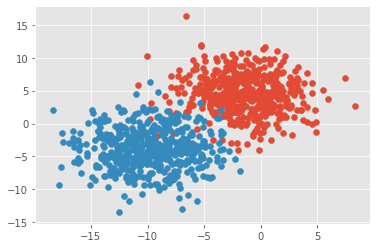

In [5]:
for class_value in range(2):
    row_ix = where (y == class_value)
    
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.show()

In [6]:
proportions = {0:5000, 1:5000}

In [7]:
n_classes = len(proportions)

largest = max([v for k, v in proportions.items()])
n_samples = largest * n_classes

In [8]:
X_list, y_list = list(), list()

for k, v in proportions.items():
    row_ix = where(y==k)[0]
    selected = row_ix[:v]
    X_list.append(X[selected, :])
    y_list.append(y[selected])

In [9]:
def get_dataset(proportions):
    n_classes = len(proportions)
    largest=max([v for k, v in proportions.items()])
    n_samples = largest*n_classes
    
    X, y = make_blobs(n_samples=n_samples, 
                      centers=n_classes, 
                      n_features=2, 
                      random_state=1, 
                      cluster_std=3)
    
    X_list, y_list = list(), list()
    for k, v in proportions.items():
        row_ix = where(y==k)[0]
        selected = row_ix[:v]
        X_list.append(X[selected, :])
        y_list.append(y[selected])
    return vstack(X_list), hstack(y_list)
    

In [10]:

def plot_dataset(X, y):
# create scatter plot for samples from each class
    n_classes = len(unique(y))
    for class_value in range(n_classes):
# get row indexes for samples with this class
        row_ix = where(y == class_value)[0]
# create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
# show a legend
    pyplot.legend()
# show the plot
    pyplot.show()


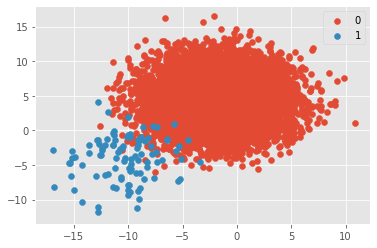

In [11]:
# define the class distribution
proportions = {0:10000, 1:100}
# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)

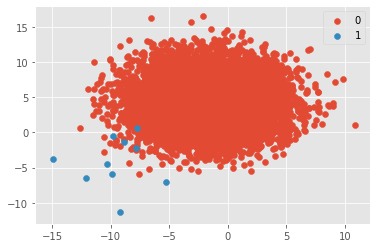

In [12]:
# define the class distribution
proportions = {0:10000, 1:10}
# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)

In [13]:
from collections import Counter

Size=100, Ratio=Counter({0: 99, 1: 1})
Size=1000, Ratio=Counter({0: 990, 1: 10})
Size=10000, Ratio=Counter({0: 9900, 1: 100})
Size=100000, Ratio=Counter({0: 99000, 1: 1000})


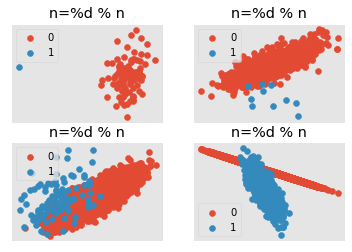

In [14]:
sizes = [100, 1000, 10000, 100000]

for i in range(len(sizes)):
    n = sizes[i]
    X, y = make_classification(n_samples=n, 
                               n_features=2, 
                               n_redundant=0,
                               n_clusters_per_class=1, 
                               weights=[0.99],
                              flip_y=0,
                              random_state=1)
    counter = Counter(y)
#     print('Size=%d', Ratio=%s' % (n, counter))
    print('Size=%d, Ratio=%s' % (n, counter))
    plt.subplot(2,2, 1+i)
    plt.title('n=%d % n')
    plt.xticks([])
    plt.yticks([])
    
    for label, _ in counter.items():
        row_ix = where(y==label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
        
    plt.legend()
plt.show()

In [15]:
counter

Counter({0: 99000, 1: 1000})

In [16]:
for label, _ in counter.items():
    print(label)

0
1


In [17]:
row_ix = where(y==0)[0]

In [18]:
row_ix

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [19]:
X[row_ix, 0]

array([1.56110289, 1.54934045, 0.30746465, ..., 1.89981237, 2.11010568,
       2.09494102])

In [20]:
X

array([[1.56110289, 0.75561859],
       [1.54934045, 0.75080947],
       [0.30746465, 1.31293829],
       ...,
       [1.89981237, 0.58332559],
       [2.11010568, 0.48715721],
       [2.09494102, 0.48171839]])

In [21]:
y

array([0, 0, 0, ..., 0, 0, 0])